In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,NaN,-0.37708,NaN,0.03760,...,NaN,NaN,NaN,-0.46168,NaN,-0.34090,NaN,-0.54487,NaN,NaN
1,1,0,1.00000,-0.18829,0.93035,-0.36156,NaN,-0.93597,NaN,-0.04549,...,NaN,NaN,NaN,-0.18401,NaN,-0.11593,NaN,-0.06288,NaN,NaN
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	17
float64		column 4	0
float64		column 5	52
float64		column 6	0
float64		column 7	69
float64		column 8	35
float64		column 9	69
float64		column 10	35
float64		column 11	52
float64		column 12	18
float64		column 13	69
float64		column 14	34
float64		column 15	52
float64		column 16	0
float64		column 17	52
float64		column 18	0
float64		column 19	69
float64		column 20	17
float64		column 21	51
float64		column 22	17
float64		column 23	69
float64		column 24	0
float64		column 25	69
float64		column 26	17
float64		column 27	69
float64		column 28	0
float64		column 29	69
float64		column 30	0
float64		column 31	69
float64		column 32	17
float64		column 33	69
float64		column 34	17


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,351.000000,351.0,334.000000,351.000000,299.000000,351.000000,282.000000,316.000000,282.000000,316.000000,...,282.000000,334.000000,282.000000,351.000000,282.000000,351.000000,282.000000,334.000000,282.000000,334.000000
mean,0.891738,0.0,0.632159,0.044372,0.593855,0.115889,0.559142,0.115678,0.518435,0.171814,...,0.412473,-0.076724,0.549917,-0.069538,0.394569,-0.027907,0.373469,-0.000991,0.369865,0.009279
std,0.311155,0.0,0.504307,0.441435,0.522826,0.460810,0.488978,0.519700,0.491882,0.476611,...,0.574682,0.510316,0.499050,0.550025,0.574725,0.507974,0.570824,0.516368,0.524168,0.468914
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.468612,-0.064735,0.418075,-0.024795,0.275172,-0.055640,0.111107,-0.047147,...,0.000000,-0.332860,0.330307,-0.443165,0.000000,-0.236885,0.000000,-0.239347,0.000000,-0.178432
50%,1.000000,0.0,0.869605,0.016310,0.799460,0.022800,0.728000,0.013660,0.692890,0.016600,...,0.583745,-0.015995,0.703345,-0.017690,0.526720,0.000000,0.481750,0.000000,0.462100,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.970445,0.417290,0.931050,0.476062,...,0.900530,0.157922,0.980943,0.153535,0.892033,0.154075,0.859490,0.200935,0.827128,0.169745
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

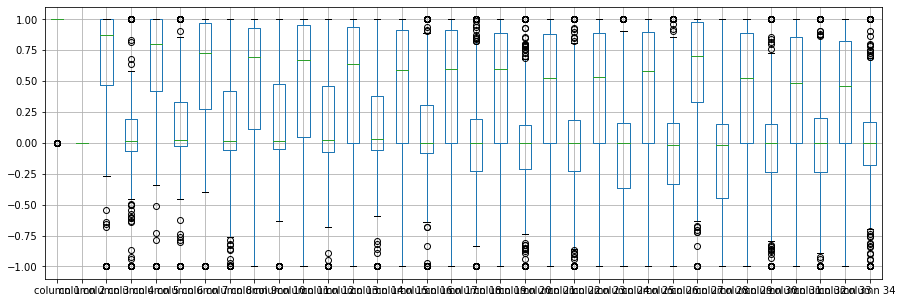

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     0.891738
column 2     0.000000
column 3     0.632159
column 4     0.044372
column 5     0.593855
column 6     0.115889
column 7     0.559142
column 8     0.115678
column 9     0.518435
column 10    0.171814
column 11    0.481444
column 12    0.148295
column 13    0.389021
column 14    0.107277
column 15    0.342891
column 16    0.071132
column 17    0.388377
column 18   -0.003617
column 19    0.372493
column 20   -0.019056
column 21    0.345720
column 22    0.013105
column 23    0.357199
column 24   -0.057406
column 25    0.412473
column 26   -0.076724
column 27    0.549917
column 28   -0.069538
column 29    0.394569
column 30   -0.027907
column 31    0.373469
column 32   -0.000991
column 33    0.369865
column 34    0.009279
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.343978,-0.006529,0.167770,0.127606,0.185988,0.034402,0.229815,-0.090974,...,0.011353,0.149598,-0.157155,-0.010725,0.104335,-0.121415,0.175994,-0.094295,0.189371,0.007100
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.343978,NaN,1.000000,0.162286,0.446066,0.024699,0.374459,0.047976,0.418032,0.082389,...,0.325789,-0.077071,0.104293,0.132597,0.383266,0.069298,0.280119,0.002886,0.251001,-0.032859
column 4,-0.006529,NaN,0.162286,1.000000,0.049185,-0.190308,-0.095412,0.236727,-0.300477,0.133948,...,-0.114998,-0.243996,0.007001,0.000743,-0.031194,0.342301,-0.098183,-0.108030,-0.100804,0.031161
column 5,0.167770,NaN,0.446066,0.049185,1.000000,0.030279,0.617697,-0.028344,0.411383,-0.014074,...,0.253682,-0.062888,0.140417,0.176255,0.300702,0.040749,0.403748,0.043613,0.405426,-0.099155
column 6,0.127606,NaN,0.024699,-0.190308,0.030279,1.000000,-0.005783,0.298141,-0.126491,0.189306,...,-0.203332,0.045146,-0.183813,-0.068775,-0.044751,-0.158090,-0.104503,0.342131,-0.005073,0.183278
column 7,0.185988,NaN,0.374459,-0.095412,0.617697,-0.005783,1.000000,-0.184619,0.418897,-0.116915,...,0.248451,0.099458,0.125117,0.070717,0.265832,-0.055718,0.464788,0.019830,0.591300,-0.128266
column 8,0.034402,NaN,0.047976,0.236727,-0.028344,0.298141,-0.184619,1.000000,-0.332037,0.335695,...,-0.186500,-0.157207,-0.248570,0.070370,-0.166818,0.101941,-0.188092,0.206634,-0.209689,0.384130
column 9,0.229815,NaN,0.418032,-0.300477,0.411383,-0.126491,0.418897,-0.332037,1.000000,-0.273733,...,0.364752,0.121636,0.148566,0.117347,0.348880,-0.062544,0.301709,-0.089996,0.317854,-0.102441
column 10,-0.090974,NaN,0.082389,0.133948,-0.014074,0.189306,-0.116915,0.335695,-0.273733,1.000000,...,-0.254574,-0.045264,-0.270463,0.064887,-0.142582,-0.015038,-0.147761,0.008390,-0.198447,0.089000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+24,34+24+24,34+24+24+24,34+24+24+24+24,34+24+24+24,34+24+24,34+24,34], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 18.116182645161945
Epoch: 1 , loss: 18.08028965904599
Epoch: 2 , loss: 18.10047113327753
Epoch: 3 , loss: 18.055507251194545
Epoch: 4 , loss: 17.860110509963263
Epoch: 5 , loss: 17.905878975277854
Epoch: 6 , loss: 17.925722349257697
Epoch: 7 , loss: 17.87785816192627
Epoch: 8 , loss: 17.89004761832101
Epoch: 9 , loss: 17.703799747285387
Epoch: 10 , loss: 17.751290321350098
Epoch: 11 , loss: 17.64365459623791
Epoch: 12 , loss: 17.514029048738024
Epoch: 13 , loss: 17.287626175653365
Epoch: 14 , loss: 16.742543447585334
Epoch: 15 , loss: 16.19860481080555
Epoch: 16 , loss: 15.88040592556908
Epoch: 17 , loss: 15.68611394791376
Epoch: 18 , loss: 15.551251048133487
Epoch: 19 , loss: 15.613230796087356
Epoch: 20 , loss: 15.507867358979725
Epoch: 21 , loss: 15.591821170988537
Epoch: 22 , loss: 15.457450412568592
Epoch: 23 , loss: 15.571845917474656
Epoch: 24 , loss: 15.348426909673782
Epoch: 25 , loss: 15.4291

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.000000
column 2     0.000000
column 3    -0.067043
column 4     1.000000
column 5    -0.065578
column 6     0.000000
column 7    -0.063558
column 8     0.000000
column 9    -0.062170
column 10   -1.000000
column 11   -0.062686
column 12    0.000000
column 13   -0.063808
column 14    0.003170
column 15   -1.000000
column 16   -1.000000
column 17   -0.063570
column 18   -1.000000
column 19   -0.062000
column 20    1.000000
column 21   -0.061178
column 22   -0.006394
column 23   -0.061215
column 24    0.000000
column 25   -0.060750
column 26    0.000000
column 27   -0.058730
column 28   -1.000000
column 29   -0.055384
column 30    1.000000
column 31   -0.051032
column 32    1.000000
column 33   -0.049268
column 34    1.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0,0.0,0.0,0.0,0.0,0.036232,0.0,-0.158284,0.0,...,0.207802,0.445716,0.409139,0.0,0.505962,0.0,0.257508,0.0,0.47649,0.437542
1,0,0,0.0,0.0,0.0,0.0,0.541448,0.0,-0.579676,0.0,...,0.578311,0.218835,0.607560,0.0,0.547446,0.0,0.502291,0.0,0.46181,0.022476
2,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000
3,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000
4,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000
347,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000
348,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000
349,0,0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

19.412581299656516

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [18]:
NRMS=numerator/denominator
NRMS


0.28356022923156493

In [19]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.33266
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.870212,-0.37708,0.841716,0.03760,...,0.775912,-0.065994,0.819919,-0.46168,0.718622,-0.34090,0.680178,-0.54487,0.66290,-0.015458
1,1,0,1.00000,-0.18829,0.93035,-0.36156,0.432768,-0.93597,0.420324,-0.04549,...,0.374991,-0.046855,0.402880,-0.18401,0.357046,-0.11593,0.336031,-0.06288,0.32443,-0.001994
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.000000,-0.12062,0.889650,0.01198,...,0.575280,-0.402200,0.589840,-0.22145,0.431000,-0.17365,0.604360,-0.24180,0.56045,-0.382380
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.712160,-1.00000,0.000000,0.00000,...,1.000000,0.906950,0.516130,1.00000,1.000000,-0.20099,0.256820,1.00000,-0.32382,1.000000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.921060,-0.23255,0.771520,-0.16399,...,0.032860,-0.651580,0.132900,-0.53206,0.024310,-0.62197,-0.057070,-0.59573,-0.04608,-0.656970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.843490,-0.05567,0.904410,-0.04622,...,0.953780,-0.042020,0.834790,0.00123,1.000000,0.12815,0.866600,-0.10714,0.90546,-0.043070
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.934380,-0.01920,0.945900,0.01606,...,0.945200,0.013610,0.935220,0.04925,0.931590,0.08168,0.940660,-0.00035,0.91483,0.047120
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.951770,-0.03431,0.955840,0.02446,...,0.939880,0.031930,0.924890,0.02542,0.921200,0.02242,0.924590,0.00442,0.92697,-0.005770
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.956910,-0.03646,0.857460,0.00110,...,0.910500,-0.020990,0.891470,-0.07760,0.829830,-0.17238,0.960220,-0.03757,0.87403,-0.162430


In [21]:
imputations[-1].to_excel("Ionosphere_AL_10(imp).xlsx", index=False, header=False)